In [65]:
import torch
from GAN.dataset import VeenstraDataset
import matplotlib.pyplot as plt
from GAN.utils import scale_input
from GAN.metrics import normalized_mean_squared_error, inception_score, pique, ssim

In [15]:
data = VeenstraDataset()

In [21]:
mr1 = data[0][0]
mr2 = data[1][0]
mr3 = data[2][0]
mr4 = data[3][0]

/Users/kjwdamme/opt/anaconda3/envs/DeepLearning/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


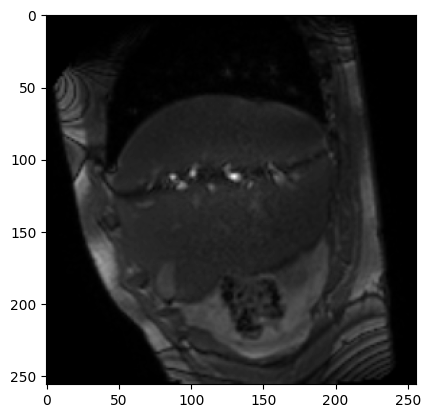

In [17]:
plt.imshow(mr1.squeeze(), cmap="gray")

In [19]:
inception_score(mr1.squeeze()[None])

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 768, 1, 1])

In [27]:
mr_batch = torch.stack([mr1, mr2, mr3, mr4])
mr_batch.shape

torch.Size([4, 1, 256, 256])

In [35]:
inception_score(mr_batch)

tensor(1.3874, grad_fn=<ExpBackward0>)

Text(0, 0.5, 'SSIM')

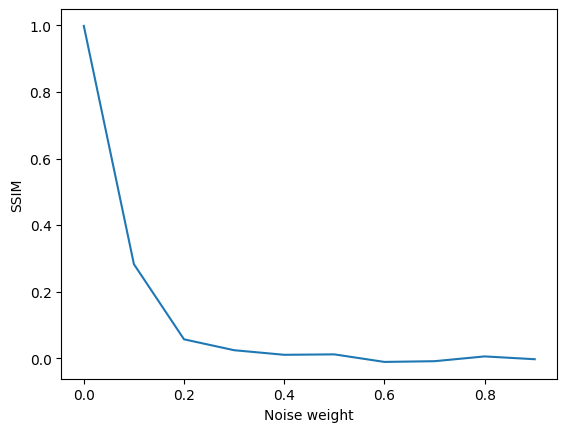

In [67]:
scores = []
weights = []

for w in torch.arange(0, 1, step=.1):
    weights.append(w)
    noise_batch = torch.randn(mr_batch.shape) * w
    noised_image_batch = scale_input(mr_batch + noise_batch, -1, 1)
    score = ssim(noised_image_batch, mr_batch).mean()
    scores.append(score)

plt.plot(weights, scores)
plt.xlabel("Noise weight")
plt.ylabel("SSIM")

In [60]:
scores

[tensor([-0.2790, -0.1421, -0.1655, -0.2673]),
 tensor([-0.3364, -0.2595, -0.2757, -0.3329]),
 tensor([-0.2584, -0.2073, -0.2223, -0.2644]),
 tensor([-0.2215, -0.1873, -0.1979, -0.2246]),
 tensor([-0.1773, -0.1524, -0.1595, -0.1802]),
 tensor([-0.1510, -0.1328, -0.1376, -0.1568]),
 tensor([-0.1385, -0.1223, -0.1269, -0.1435]),
 tensor([-0.1337, -0.1188, -0.1214, -0.1378]),
 tensor([-0.1365, -0.1246, -0.1286, -0.1375]),
 tensor([-0.1283, -0.1162, -0.1217, -0.1307])]